# Logistic Regression-Email Spam or Ham

In [2]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

In [4]:
email = pd.read_csv('spam.csv', encoding='latin-1')

In [5]:
email.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## EDA

In [6]:
email = email.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
email = email.rename(columns={"v1":"label", "v2":"text"})

In [7]:
email.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
email.groupby("label").describe()

text                                                               
      count unique                                                top freq
label                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

### Distribution of the target variable

In [9]:
email.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

<AxesSubplot:>

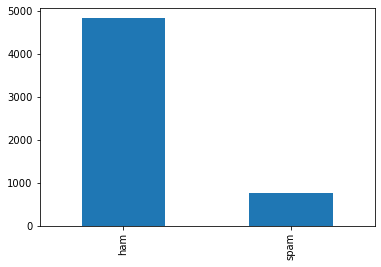

In [10]:
email.label.value_counts().plot.bar()

### Add numerical label for spam

In [11]:
email['spam'] = email['label'].map( {'spam': 1, 'ham': 0} ).astype(int)
email.head(15)

,label,text,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
6,ham,Even my brother is not like to speak with me. ...,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1


In [14]:
email['length'] = email['text'].apply(len)
email.head()

,label,text,spam,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


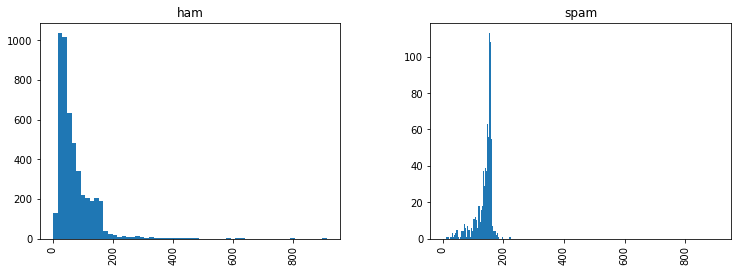

In [15]:
email.hist(column='length',by='label',bins=60,figsize=(12,4));
plt.xlim(-40,950);

## Preprocessing

### Remove Punctuation and Stopwords

In [16]:
import string
from nltk.corpus import stopwords

In [17]:
def remove_punctuation_and_stopwords(sms):
    
    sms_no_punctuation = [ch for ch in sms if ch not in string.punctuation]
    sms_no_punctuation = "".join(sms_no_punctuation).split()
    
    sms_no_punctuation_no_stopwords = \
        [word.lower() for word in sms_no_punctuation if word.lower() not in stopwords.words("english")]
        
    return sms_no_punctuation_no_stopwords

In [18]:
email['text'].apply(remove_punctuation_and_stopwords).head()

0    [go, jurong, point, crazy, available, bugis, n...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, 2, wkly, comp, win, fa, cup, fin...
3        [u, dun, say, early, hor, u, c, already, say]
4    [nah, dont, think, goes, usf, lives, around, t...
Name: text, dtype: object

### Bag of words with CountVectorizer

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer = remove_punctuation_and_stopwords).fit(email['text'])

In [20]:
print(len(bow_transformer.vocabulary_))

9431


In [21]:
#some vectorization examples for spam and ham messages
sample_spam = email['text'][8]
bow_sample_spam = bow_transformer.transform([sample_spam])
print(sample_spam)
print(bow_sample_spam)

WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
  (0, 218)	1
  (0, 323)	1
  (0, 1906)	1
  (0, 2184)	2
  (0, 2245)	1
  (0, 2531)	1
  (0, 4194)	1
  (0, 4759)	1
  (0, 5707)	1
  (0, 6538)	1
  (0, 6775)	1
  (0, 6946)	1
  (0, 7209)	1
  (0, 8694)	1
  (0, 8698)	1
  (0, 9028)	1
  (0, 9418)	1


In [22]:
rows, cols = bow_sample_spam.nonzero()
for col in cols: 
    print(bow_transformer.get_feature_names()[col])

09061701461
12
call
claim
code
customer
hours
kl341
network
prize
receivea
reward
selected
valid
valued
winner
å£900


In [23]:
print(np.shape(bow_sample_spam))

(1, 9431)


In [25]:
sample_ham = email['text'][4]
bow_sample_ham = bow_transformer.transform([sample_ham])
print(sample_ham)
print(bow_sample_ham)

Nah I don't think he goes to usf, he lives around here though
  (0, 1279)	1
  (0, 2882)	1
  (0, 3762)	1
  (0, 5004)	1
  (0, 5631)	1
  (0, 8224)	1
  (0, 8243)	1
  (0, 8664)	1


In [26]:
rows, cols = bow_sample_ham.nonzero()
for col in cols: 
    print(bow_transformer.get_feature_names()[col])

around
dont
goes
lives
nah
think
though
usf


Applying bow_transformer on all messages

In [27]:
bow_data = bow_transformer.transform(email['text'])

In [28]:
bow_data.shape

(5572, 9431)

In [29]:
bow_data.nnz

49772

In [30]:
bow_data

<5572x9431 sparse matrix of type '<class 'numpy.int64'>'
	with 49772 stored elements in Compressed Sparse Row format>

In [31]:
bow_data.shape[0]

5572

In [32]:
print( bow_data.nnz / (bow_data.shape[0] * bow_data.shape[1]) *100 )

0.09471444959776236


## Term frequency inverse document frequency - TFIDF

In [33]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(bow_data)

In [34]:
tfidf_sample_ham = tfidf_transformer.transform(bow_sample_ham)
print(tfidf_sample_ham)

  (0, 8664)	0.4000611457714059
  (0, 8243)	0.35462891367407595
  (0, 8224)	0.2665748147939407
  (0, 5631)	0.40493594386802356
  (0, 5004)	0.44910913790937335
  (0, 3762)	0.35674330934716636
  (0, 2882)	0.23016324066220836
  (0, 1279)	0.31179198007951625


In [35]:
tfidf_sample_spam = tfidf_transformer.transform(bow_sample_spam)
print(tfidf_sample_spam)

  (0, 9418)	0.2604683359422661
  (0, 9028)	0.23445094204464131
  (0, 8698)	0.24115248419490207
  (0, 8694)	0.22254833340975305
  (0, 7209)	0.2148462495005997
  (0, 6946)	0.2564029044370425
  (0, 6775)	0.2943229069695555
  (0, 6538)	0.178899142428953
  (0, 5707)	0.2148462495005997
  (0, 4759)	0.2943229069695555
  (0, 4194)	0.22555164191980467
  (0, 2531)	0.1915015107445745
  (0, 2245)	0.21371446699888028
  (0, 2184)	0.3406301232141347
  (0, 1906)	0.1153380143353214
  (0, 323)	0.2387711073538672
  (0, 218)	0.2943229069695555


In [36]:
data_tfidf = tfidf_transformer.transform(bow_data)

In [37]:
np.shape(data_tfidf)

(5572, 9431)

## train test split

In [41]:
from sklearn.model_selection import train_test_split

data_tfidf_train, data_tfidf_test, label_train, label_test =train_test_split(data_tfidf, email["spam"], 
                                                                             test_size=0.3, random_state=5)

In [43]:
from scipy.sparse import  hstack
X2 = hstack((data_tfidf ,np.array(email['length'])[:,None])).A

In [45]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, email["spam"], test_size=0.3, random_state=5)

### Classifiers

In [46]:
data_tfidf_train = data_tfidf_train.A
data_tfidf_test = data_tfidf_test.A

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
spam_detect_model = LogisticRegression(random_state=0).fit(data_tfidf_train, label_train)

In [49]:
pred_test_LRC = spam_detect_model.predict(data_tfidf_test)
acc_LRC = accuracy_score(label_test, pred_test_MNB)
print(acc_LRC)

0.9563397129186603


In [50]:
# normalization
scaler = MinMaxScaler()
data_tfidf_train_sc = scaler.fit_transform(data_tfidf_train)
data_tfidf_test_sc  = scaler.transform(data_tfidf_test)

In [51]:
spam_detect_model_minmax = LogisticRegression(random_state=0).fit(data_tfidf_train_sc, label_train)
pred_test_LRC = spam_detect_model_minmax.predict(data_tfidf_test_sc)
acc_LRC = accuracy_score(label_test, pred_test_LRC)
print(acc_LRC)

0.9748803827751196


In [74]:
pred_test_LRC_prob= spam_detect_model_minmax.predict_proba(data_tfidf_test_sc)

After normalization we are getting more accuracy

In [54]:
confusion = confusion_matrix(label_test, pred_test_LRC)

In [55]:
confusion

array([[1464,    1],
       [  41,  166]], dtype=int64)

In [56]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [57]:
# Let's see the sensitivity of our logistic regression model

sensitivity = TP / float(TP+FN)
print(sensitivity)

0.8019323671497585


In [64]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score

In [65]:
def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    #fig, ax = plt.subplots(figsize=(4,4))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,  
                cmap="Blues", square=True, cbar=False)
    #  
    plt.ylabel('true label')
    plt.xlabel('predicted label')

In [66]:
list_clf = ["LRC"]

list_pred = [pred_test_LRC,]

dict_pred = dict(zip(list_clf, list_pred))

In [67]:
def plot_all_confusion_matrices(y_true, dict_all_pred, str_title):
    
    list_classifiers = list(dict_all_pred.keys())
    plt.figure(figsize=(10,7.5))
    plt.suptitle(str_title, fontsize=20, fontweight='bold')
    n=231

    for clf in list_classifiers : 
        plt.subplot(n)
        plot_confusion_matrix(y_true, dict_all_pred[clf])
        plt.title(clf, fontweight='bold')
        n+=1

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)

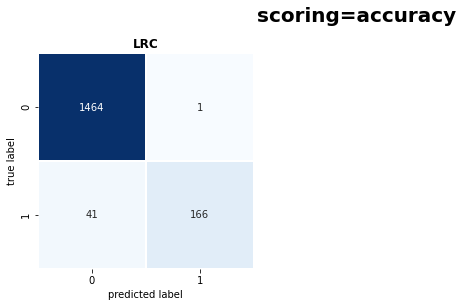

In [68]:
plot_all_confusion_matrices(label_test, dict_pred, "scoring=accuracy")

In [72]:
print(classification_report(label_test, pred_test_))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1465
           1       0.99      0.80      0.89       207

    accuracy                           0.97      1672
   macro avg       0.98      0.90      0.94      1672
weighted avg       0.98      0.97      0.97      1672



In [73]:
for clf in list_clf :
    print(clf, " ", roc_auc_score(label_test, dict_pred[clf] ))

LRC   0.9006248866465517


In [76]:
ns_probs = [0 for _ in range(len(label_test))]
lr_probs = pred_test_LRC_prob[:, 1]
# calculate scores
ns_auc = roc_auc_score(label_test, ns_probs)
lr_auc = roc_auc_score(label_test, lr_probs)

Logistic: ROC AUC=0.989


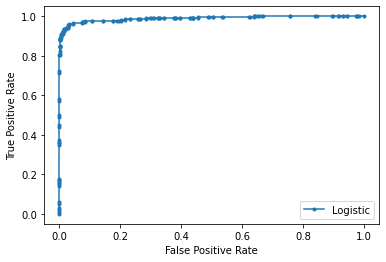

In [82]:
from sklearn.metrics import roc_curve
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(label_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(label_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()